## Workout Model Training

In [1]:
!pip install pandas numpy scikit-learn matplotlib seaborn joblib tensorflow

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   ------ --------------------------------- 1.3/8.1 MB 7.1 MB/s eta 0:00:01
   --------------- ------------------------ 3.1/8.1 MB 7.4 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 7.2 MB/s eta 0:00:01
   ---------------------------------- ----- 7.1/8.1 MB 6.8 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 6.6 MB/s eta 0:00:00
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 8.6 MB/s eta 0:00:01
   ---------------------------------------- 2.3/2.3 MB 8.2 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load the dataset
df = pd.read_csv('workout_dataset.csv')  

In [4]:
# Display basic information
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

Dataset Overview:
   user_id  age  gender   bmi activity_level health_condition  \
0        1   24    Male  19.9            Low              NaN   
1        2   15    Male  27.3         Medium          Obesity   
2        3   16    Male  15.7         Medium     Hypertension   
3        4   15  Female  30.3           High              NaN   
4        5   28    Male  34.3            Low              NaN   

  recommended_workout  duration_minutes  calories_burned  
0             Walking                37            126.5  
1            Swimming                53            523.9  
2       Brisk Walking                30             99.5  
3             Running                33            442.4  
4             Walking                23            119.2  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id      


=== DATA VISUALIZATION ===


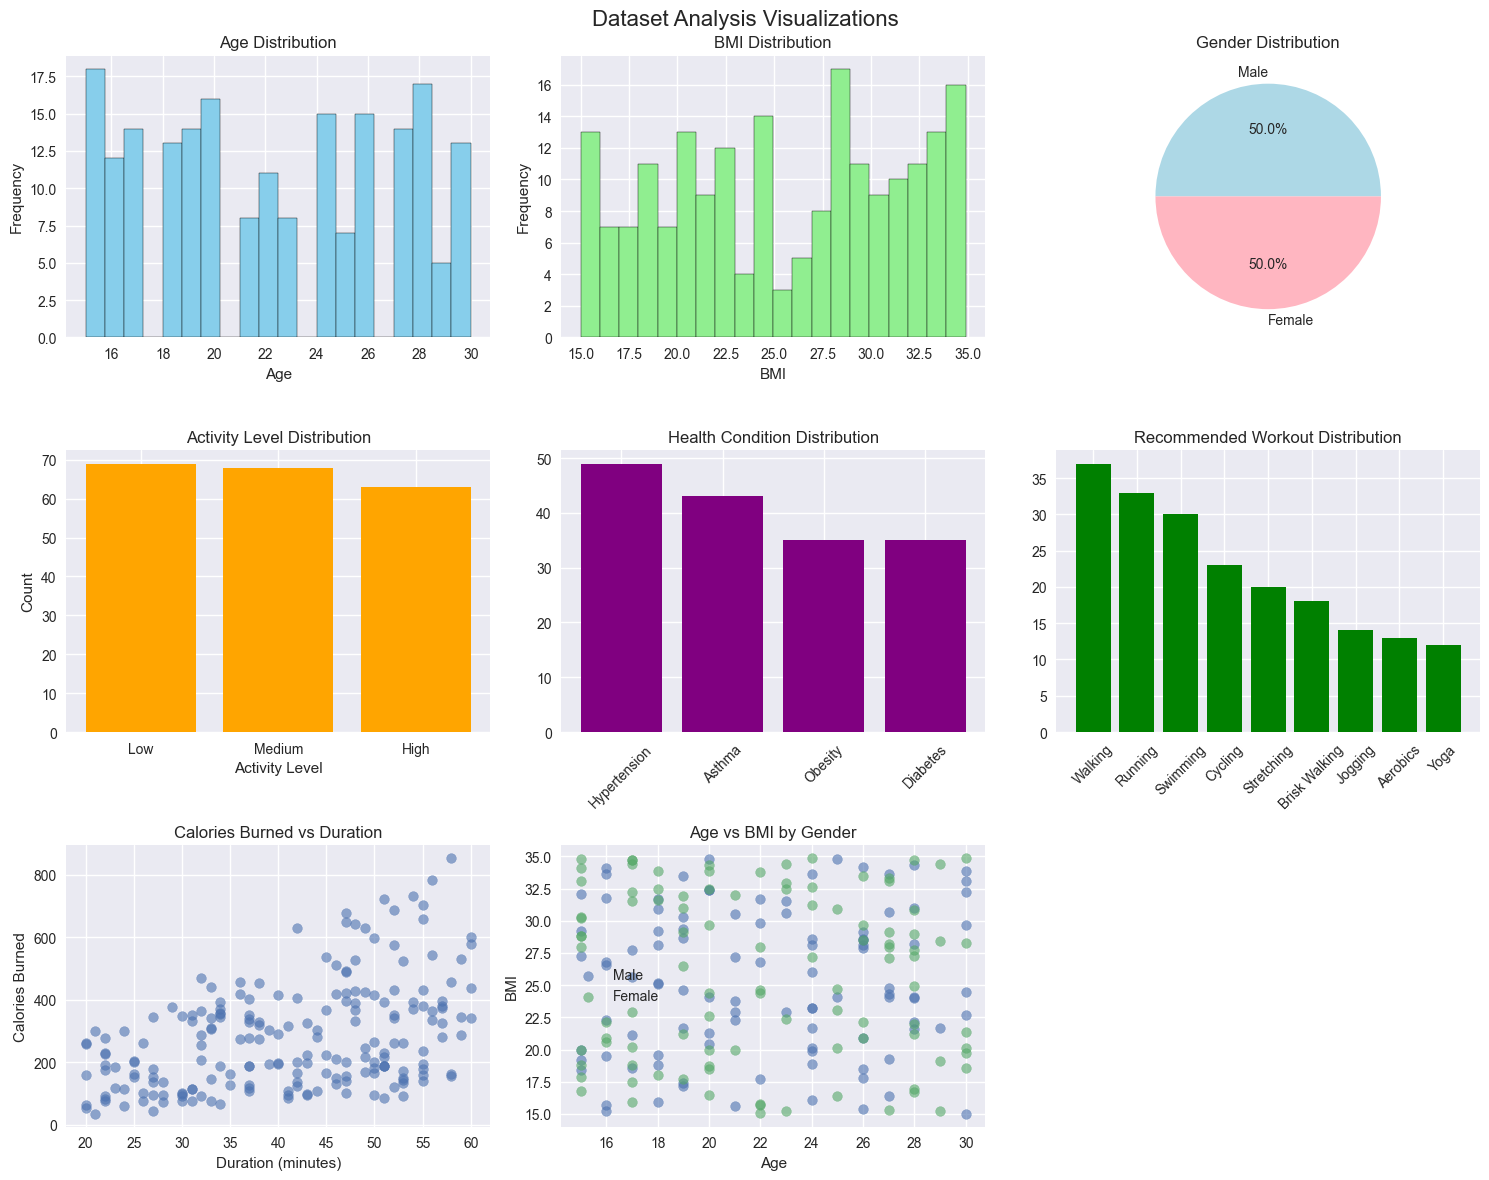

In [5]:
# 1. DATA VISUALIZATION
print("\n=== DATA VISUALIZATION ===")

# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Dataset Analysis Visualizations', fontsize=16)

axes[0, 0].hist(df['age'], bins=20, color='skyblue', edgecolor='black')
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Frequency')

# BMI distribution
axes[0, 1].hist(df['bmi'], bins=20, color='lightgreen', edgecolor='black')
axes[0, 1].set_title('BMI Distribution')
axes[0, 1].set_xlabel('BMI')
axes[0, 1].set_ylabel('Frequency')

# Gender distribution
gender_counts = df['gender'].value_counts()
axes[0, 2].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightpink'])
axes[0, 2].set_title('Gender Distribution')

# Activity level distribution
activity_counts = df['activity_level'].value_counts()
axes[1, 0].bar(activity_counts.index, activity_counts.values, color='orange')
axes[1, 0].set_title('Activity Level Distribution')
axes[1, 0].set_xlabel('Activity Level')
axes[1, 0].set_ylabel('Count')

# Health condition distribution
health_counts = df['health_condition'].value_counts()
axes[1, 1].bar(health_counts.index, health_counts.values, color='purple')
axes[1, 1].set_title('Health Condition Distribution')
axes[1, 1].tick_params(axis='x', rotation=45)

# Recommended workout distribution
workout_counts = df['recommended_workout'].value_counts()
axes[1, 2].bar(workout_counts.index, workout_counts.values, color='green')
axes[1, 2].set_title('Recommended Workout Distribution')
axes[1, 2].tick_params(axis='x', rotation=45)

# Calories burned vs duration
axes[2, 0].scatter(df['duration_minutes'], df['calories_burned'], alpha=0.6)
axes[2, 0].set_title('Calories Burned vs Duration')
axes[2, 0].set_xlabel('Duration (minutes)')
axes[2, 0].set_ylabel('Calories Burned')

# Age vs BMI colored by gender
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    axes[2, 1].scatter(subset['age'], subset['bmi'], alpha=0.6, label=gender)
axes[2, 1].set_title('Age vs BMI by Gender')
axes[2, 1].set_xlabel('Age')
axes[2, 1].set_ylabel('BMI')
axes[2, 1].legend()

# Hide the last subplot
axes[2, 2].axis('off')

plt.tight_layout()
plt.savefig('data_visualization.png', dpi=300, bbox_inches='tight')
plt.show()


In [6]:
# 2. DATA PREPROCESSING
print("\n=== DATA PREPROCESSING ===")

# Create copies of the original data for encoding
df_encoded = df.copy()

# Initialize encoders dictionary to save them
encoders = {}

# Encode categorical variables
categorical_cols = ['gender', 'activity_level', 'health_condition', 'recommended_workout']
for col in categorical_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    encoders[col] = le
    print(f"Encoded {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")


=== DATA PREPROCESSING ===
Encoded gender: {'Female': np.int64(0), 'Male': np.int64(1)}
Encoded activity_level: {'High': np.int64(0), 'Low': np.int64(1), 'Medium': np.int64(2)}
Encoded health_condition: {'Asthma': np.int64(0), 'Diabetes': np.int64(1), 'Hypertension': np.int64(2), 'Obesity': np.int64(3), nan: np.int64(4)}
Encoded recommended_workout: {'Aerobics': np.int64(0), 'Brisk Walking': np.int64(1), 'Cycling': np.int64(2), 'Jogging': np.int64(3), 'Running': np.int64(4), 'Stretching': np.int64(5), 'Swimming': np.int64(6), 'Walking': np.int64(7), 'Yoga': np.int64(8)}


In [7]:
# Save the encoders
joblib.dump(encoders, 'encoders.pkl')
print("Encoders saved as 'encoders.pkl'")

Encoders saved as 'encoders.pkl'


In [8]:
# Separate features and target
X = df_encoded.drop(['user_id', 'recommended_workout'], axis=1)
y = df_encoded['recommended_workout']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [9]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['age', 'bmi', 'duration_minutes', 'calories_burned']
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Save the scaler
joblib.dump(scaler, 'scaler.pkl')
print("Scaler saved as 'scaler.pkl'")

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Scaler saved as 'scaler.pkl'
Training set shape: (160, 7)
Test set shape: (40, 7)


In [10]:
# 3. NEURAL NETWORK MODEL TRAINING
print("\n=== NEURAL NETWORK TRAINING ===")

# Define the model
def create_model(optimizer='adam', hidden_layers=2, neurons=64):
    model = keras.Sequential()
    
    # Input layer
    model.add(layers.Dense(neurons, activation='relu', input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(0.2))
    
    # Hidden layers
    for _ in range(hidden_layers - 1):
        model.add(layers.Dense(neurons, activation='relu'))
        model.add(layers.Dropout(0.2))
    
    # Output layer
    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))
    
    # Compile the model
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


=== NEURAL NETWORK TRAINING ===


In [11]:
# Create and train multiple models to find the best one
best_accuracy = 0
best_model = None

# Try different architectures
architectures = [
    {'hidden_layers': 2, 'neurons': 32, 'epochs': 50},
    {'hidden_layers': 2, 'neurons': 64, 'epochs': 50},
    {'hidden_layers': 3, 'neurons': 64, 'epochs': 50},
    {'hidden_layers': 3, 'neurons': 128, 'epochs': 50}
]

for i, arch in enumerate(architectures):
    print(f"\nTraining Model {i+1}: {arch}")
    
    model = create_model(hidden_layers=arch['hidden_layers'], neurons=arch['neurons'])
    
    # Add early stopping
    early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    # Train the model
    history = model.fit(X_train, y_train,
                        epochs=arch['epochs'],
                        batch_size=32,
                        validation_split=0.2,
                        callbacks=[early_stopping],
                        verbose=0)
    
    # Evaluate the model
    test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy: {test_accuracy:.4f}")
    
    # Save the best model
    if test_accuracy > best_accuracy:
        best_accuracy = test_accuracy
        best_model = model
        best_arch = arch
        print("New best model found!")



Training Model 1: {'hidden_layers': 2, 'neurons': 32, 'epochs': 50}
Test Accuracy: 0.6000
New best model found!

Training Model 2: {'hidden_layers': 2, 'neurons': 64, 'epochs': 50}
Test Accuracy: 0.7500
New best model found!

Training Model 3: {'hidden_layers': 3, 'neurons': 64, 'epochs': 50}
Test Accuracy: 0.8500
New best model found!

Training Model 4: {'hidden_layers': 3, 'neurons': 128, 'epochs': 50}
Test Accuracy: 0.9000
New best model found!


In [12]:
# Save the best model
best_model.save('best_workout_model.h5')
print(f"\nBest model saved with accuracy: {best_accuracy:.4f}")
print(f"Best architecture: {best_arch}")

# 4. MODEL EVALUATION
print("\n=== MODEL EVALUATION ===")

# Load the best model for evaluation
model = keras.models.load_model('best_workout_model.h5')

# Make predictions
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)


Best model saved with accuracy: 0.9000
Best architecture: {'hidden_layers': 3, 'neurons': 128, 'epochs': 50}

=== MODEL EVALUATION ===
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step


Final Model Accuracy: 0.9000

Classification Report:
               precision    recall  f1-score   support

     Aerobics       1.00      1.00      1.00         3
Brisk Walking       1.00      1.00      1.00         4
      Cycling       1.00      0.80      0.89         5
      Jogging       0.75      1.00      0.86         3
      Running       0.86      1.00      0.92         6
   Stretching       0.80      1.00      0.89         4
     Swimming       1.00      0.83      0.91         6
      Walking       1.00      0.71      0.83         7
         Yoga       0.67      1.00      0.80         2

     accuracy                           0.90        40
    macro avg       0.90      0.93      0.90        40
 weighted avg       0.92      0.90      0.90        40



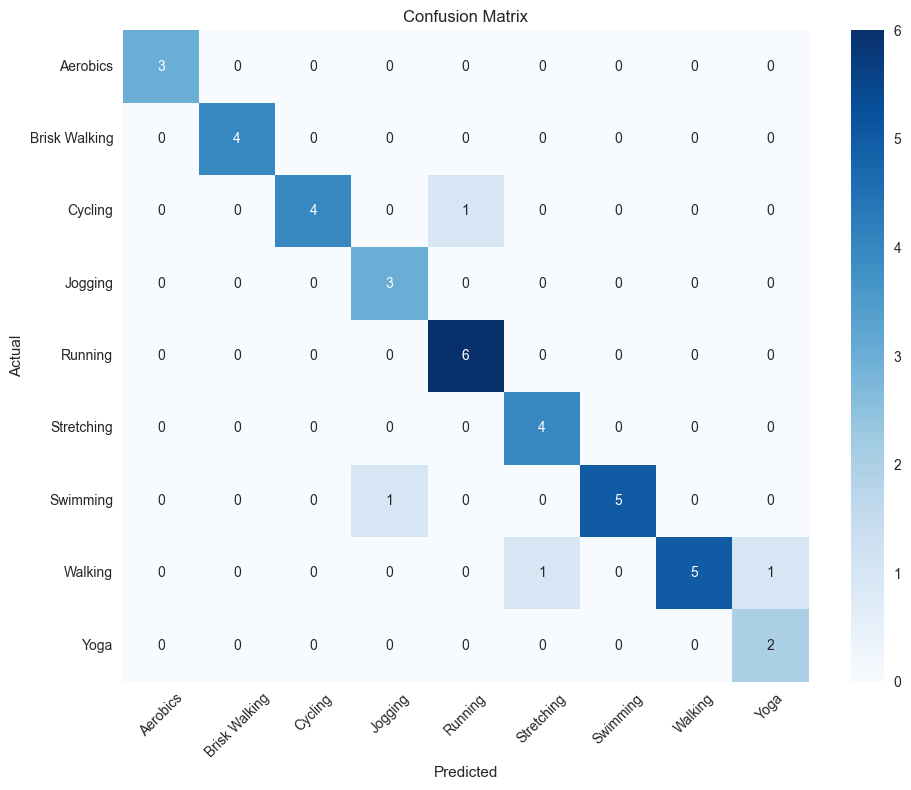

In [13]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Final Model Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=encoders['recommended_workout'].classes_))

# Confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=encoders['recommended_workout'].classes_,
            yticklabels=encoders['recommended_workout'].classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# 5. PREDICTION FUNCTION FOR NEW DATA
print("\n=== PREDICTION FUNCTION ===")

def predict_workout(new_data):
    """
    Predict workout recommendation for new data
    new_data should be a dictionary with keys: age, gender, bmi, activity_level, 
    health_condition, duration_minutes, calories_burned
    """
    # Create a DataFrame from the input
    input_df = pd.DataFrame([new_data])
    
    # Load encoders and scaler
    encoders = joblib.load('encoders.pkl')
    scaler = joblib.load('scaler.pkl')
    
    # Encode categorical variables
    for col in ['gender', 'activity_level', 'health_condition']:
        # Handle unseen labels
        if new_data[col] in encoders[col].classes_:
            input_df[col] = encoders[col].transform([new_data[col]])[0]
        else:
            # Use the most frequent category if unseen
            input_df[col] = encoders[col].transform([encoders[col].classes_[0]])[0]
    
    # Scale numerical features
    numerical_cols = ['age', 'bmi', 'duration_minutes', 'calories_burned']
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    
    # Load model and predict
    model = keras.models.load_model('best_workout_model.h5')
    prediction_proba = model.predict(input_df)
    prediction_idx = np.argmax(prediction_proba)
    
    # Get the predicted workout
    predicted_workout = encoders['recommended_workout'].inverse_transform([prediction_idx])[0]
    confidence = prediction_proba[0][prediction_idx]
    
    return predicted_workout, confidence


=== PREDICTION FUNCTION ===


In [15]:
# Example usage
example_data = {
    'age': 30,
    'gender': 'Male',
    'bmi': 22.5,
    'activity_level': 'Medium',
    'health_condition': 'None',
    'duration_minutes': 45,
    'calories_burned': 250
}

predicted_workout, confidence = predict_workout(example_data)
print(f"Example Prediction: {predicted_workout} (Confidence: {confidence:.2f})")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Example Prediction: Cycling (Confidence: 0.56)


## Lifestyle Model Training

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib
import warnings
warnings.filterwarnings('ignore')

In [17]:
# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('lifestyle_dataset.csv')

In [18]:
# Display basic information
print("="*60)
print("LIFESTYLE DATASET ANALYSIS")
print("="*60)
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Recommendations:")
print(df['recommendation'].value_counts())

LIFESTYLE DATASET ANALYSIS
Dataset Overview:
   user_id  age  gender  sleep_hours  recommended_sleep  water_intake_liters  \
0        1   27  Female          7.6                8.0                  2.7   
1        2   15  Female          6.6                8.0                  3.4   
2        3   23    Male          5.3                8.0                  2.4   
3        4   27    Male          5.7                8.0                  1.4   
4        5   28  Female          5.7                8.0                  3.4   

  stress_level  screen_time_hours                             recommendation  
0         High                7.1                    Increase sleep duration  
1     Moderate                7.1                    Increase sleep duration  
2     Moderate                4.7  Increase sleep duration; Drink more water  
3     Moderate                2.2  Increase sleep duration; Drink more water  
4         High                6.2                    Increase sleep duration  



ADVANCED DATA VISUALIZATION


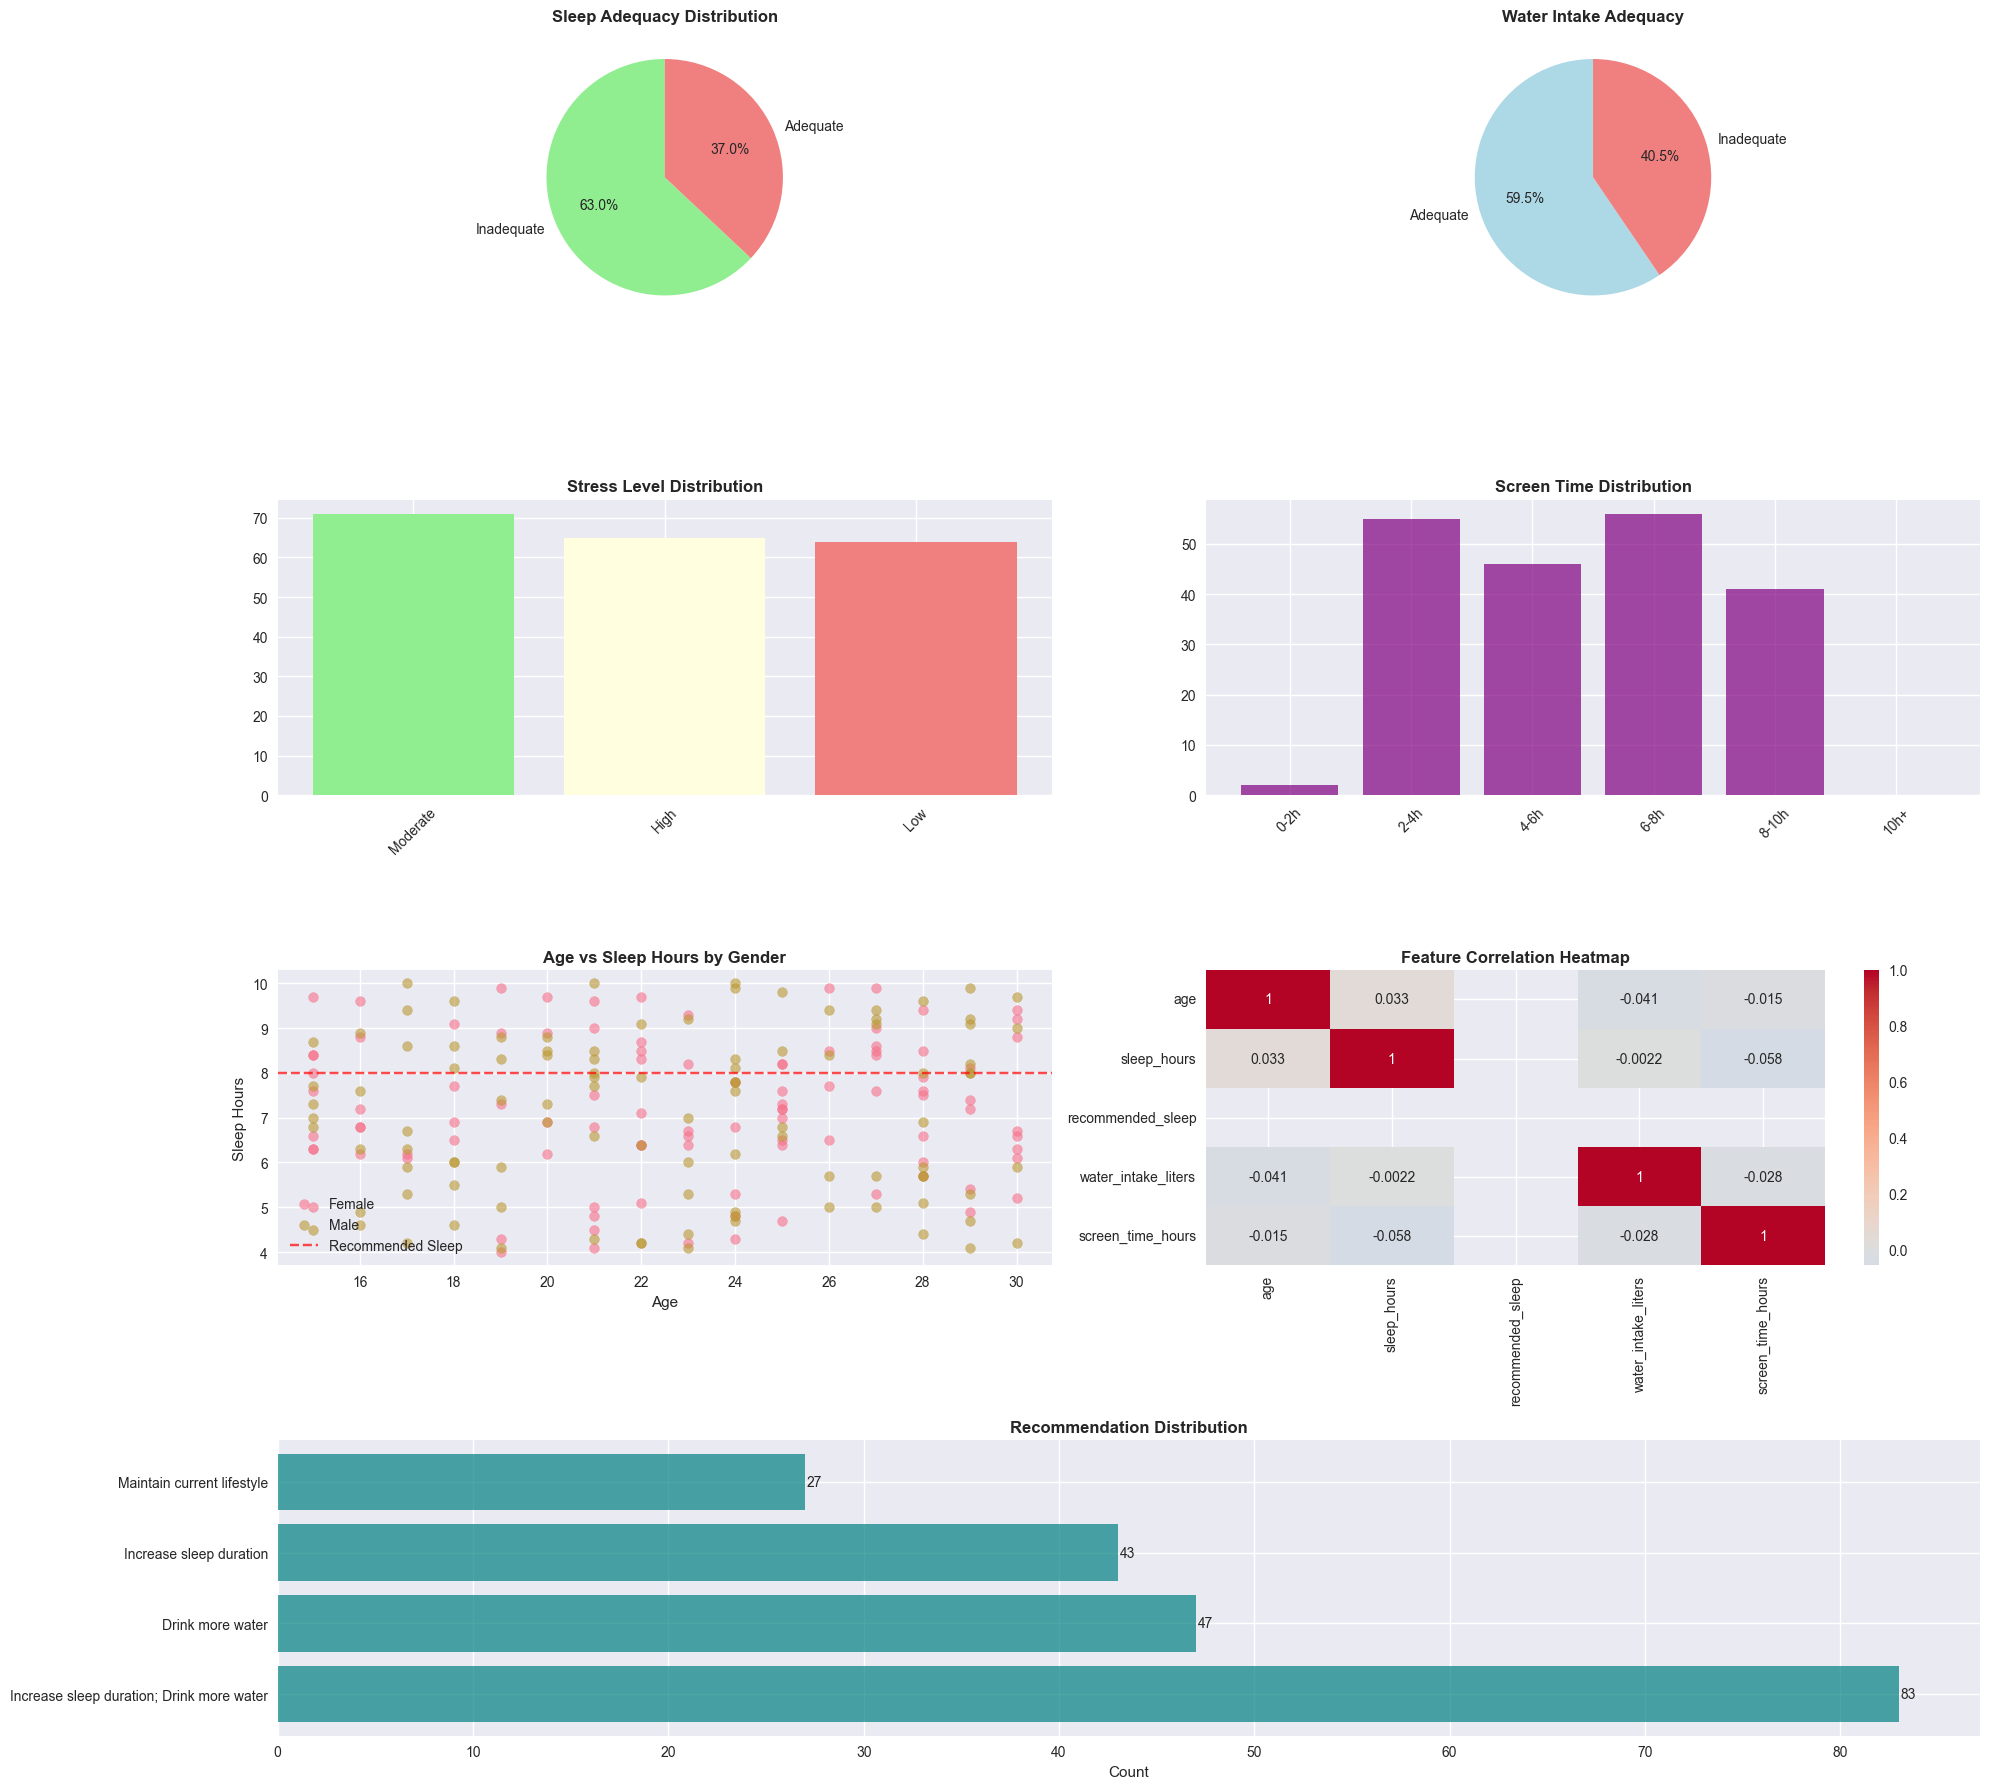

In [19]:
# 1. ADVANCED DATA VISUALIZATION
print("\n" + "="*60)
print("ADVANCED DATA VISUALIZATION")
print("="*60)

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 18))
gs = fig.add_gridspec(4, 4)

# 1.1 Sleep Analysis
ax1 = fig.add_subplot(gs[0, 0:2])
sleep_diff = df['sleep_hours'] - df['recommended_sleep']
sleep_status = np.where(sleep_diff >= 0, 'Adequate', 'Inadequate')
status_counts = pd.Series(sleep_status).value_counts()
ax1.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%', 
        colors=['lightgreen', 'lightcoral'], startangle=90)
ax1.set_title('Sleep Adequacy Distribution', fontweight='bold')

# 1.2 Water Intake Analysis
ax2 = fig.add_subplot(gs[0, 2:])
recommended_water = 2.0  # Assuming 2L as general recommendation
water_status = np.where(df['water_intake_liters'] >= recommended_water, 'Adequate', 'Inadequate')
water_counts = pd.Series(water_status).value_counts()
ax2.pie(water_counts.values, labels=water_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightcoral'], startangle=90)
ax2.set_title('Water Intake Adequacy', fontweight='bold')

# 1.3 Stress Level Distribution
ax3 = fig.add_subplot(gs[1, 0:2])
stress_counts = df['stress_level'].value_counts()
ax3.bar(stress_counts.index, stress_counts.values, 
        color=['lightgreen', 'lightyellow', 'lightcoral'])
ax3.set_title('Stress Level Distribution', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

# 1.4 Screen Time Analysis
ax4 = fig.add_subplot(gs[1, 2:])
screen_bins = [0, 2, 4, 6, 8, 10, 12]
screen_labels = ['0-2h', '2-4h', '4-6h', '6-8h', '8-10h', '10h+']
df['screen_time_category'] = pd.cut(df['screen_time_hours'], bins=screen_bins, labels=screen_labels)
screen_counts = df['screen_time_category'].value_counts().sort_index()
ax4.bar(screen_counts.index, screen_counts.values, color='purple', alpha=0.7)
ax4.set_title('Screen Time Distribution', fontweight='bold')
ax4.tick_params(axis='x', rotation=45)

# 1.5 Age vs Sleep Hours by Gender
ax5 = fig.add_subplot(gs[2, 0:2])
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    ax5.scatter(subset['age'], subset['sleep_hours'], alpha=0.6, label=gender, s=50)
ax5.axhline(y=8, color='red', linestyle='--', alpha=0.7, label='Recommended Sleep')
ax5.set_xlabel('Age')
ax5.set_ylabel('Sleep Hours')
ax5.set_title('Age vs Sleep Hours by Gender', fontweight='bold')
ax5.legend()

# 1.6 Correlation Heatmap
ax6 = fig.add_subplot(gs[2, 2:])
numeric_cols = ['age', 'sleep_hours', 'recommended_sleep', 'water_intake_liters', 
                'screen_time_hours']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax6)
ax6.set_title('Feature Correlation Heatmap', fontweight='bold')

# 1.7 Recommendation Distribution
ax7 = fig.add_subplot(gs[3, :])
recommendation_counts = df['recommendation'].value_counts()
ax7.barh(recommendation_counts.index, recommendation_counts.values, color='teal', alpha=0.7)
ax7.set_title('Recommendation Distribution', fontweight='bold')
ax7.set_xlabel('Count')
for i, v in enumerate(recommendation_counts.values):
    ax7.text(v + 0.1, i, str(v), va='center')

plt.tight_layout()
plt.savefig('lifestyle_visualization_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [20]:
# 2. ADVANCED DATA PREPROCESSING
print("\n" + "="*60)
print("ADVANCED DATA PREPROCESSING")
print("="*60)

# Create feature engineering
df_processed = df.copy()

# Create new features
df_processed['sleep_deficit'] = df_processed['recommended_sleep'] - df_processed['sleep_hours']
df_processed['sleep_ratio'] = df_processed['sleep_hours'] / df_processed['recommended_sleep']
df_processed['water_deficit'] = recommended_water - df_processed['water_intake_liters']

# Encode categorical variables
encoders = {}
categorical_cols = ['gender', 'stress_level']


ADVANCED DATA PREPROCESSING


In [21]:
# One-hot encode gender
gender_encoder = OneHotEncoder(sparse_output=False, drop='first')
gender_encoded = gender_encoder.fit_transform(df_processed[['gender']])
gender_df = pd.DataFrame(gender_encoded, columns=gender_encoder.get_feature_names_out(['gender']))
df_processed = pd.concat([df_processed, gender_df], axis=1)

# Label encode stress level
stress_encoder = LabelEncoder()
df_processed['stress_level_encoded'] = stress_encoder.fit_transform(df_processed['stress_level'])
encoders['stress_level'] = stress_encoder
encoders['gender'] = gender_encoder

In [22]:
# Label encode the target variable
target_encoder = LabelEncoder()
y = target_encoder.fit_transform(df_processed['recommendation'])
encoders['recommendation'] = target_encoder

print("Encoded target classes:")
for i, class_name in enumerate(target_encoder.classes_):
    print(f"  {class_name} -> {i}")

# Prepare features
feature_cols = ['age', 'sleep_hours', 'recommended_sleep', 'water_intake_liters', 
                'screen_time_hours', 'sleep_deficit', 'sleep_ratio', 'water_deficit',
                'stress_level_encoded'] + list(gender_df.columns)

X = df_processed[feature_cols]

Encoded target classes:
  Drink more water -> 0
  Increase sleep duration -> 1
  Increase sleep duration; Drink more water -> 2
  Maintain current lifestyle -> 3


In [23]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Save encoders and scaler
joblib.dump(encoders, 'lifestyle_encoders.pkl')
joblib.dump(scaler, 'lifestyle_scaler.pkl')
print("Encoders and scaler saved")

Encoders and scaler saved


In [24]:
# 3. COMPARATIVE MACHINE LEARNING MODELS
print("\n" + "="*60)
print("COMPARATIVE MACHINE LEARNING TRAINING")
print("="*60)

# Define models to compare
models = {
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'SVM': SVC(kernel='rbf', probability=True, random_state=42),
    'K-NN': KNeighborsClassifier(n_neighbors=5)
}

# Train and evaluate each model
results = {}
valid_models = {}  # Store models that don't have 100% accuracy

for name, model in models.items():
    print(f"\nTraining {name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        'model': model,
        'accuracy': accuracy,
        'predictions': y_pred
    }
    print(f"{name} Accuracy: {accuracy:.4f}")
    
    # Exclude models with 100% accuracy (likely overfitting/data leakage)
    if accuracy < 0.999:  # Using 0.999 to account for floating point precision
        valid_models[name] = results[name]
        print(f"✓ {name} added to valid models (accuracy < 100%)")
    else:
        print(f"✗ {name} excluded (100% accuracy indicates potential overfitting/data leakage)")

# Check if we have any valid models
if not valid_models:
    print("\n⚠️  WARNING: All models achieved 100% accuracy!")
    print("This suggests potential data leakage or overfitting.")
    print("Using all models despite 100% accuracy for comparison.")
    valid_models = results.copy()
else:
    print(f"\nFound {len(valid_models)} valid models with accuracy < 100%")

# Find best valid model
if valid_models:
    best_ml_name = max(valid_models, key=lambda x: valid_models[x]['accuracy'])
    best_ml_model = valid_models[best_ml_name]['model']
    best_ml_accuracy = valid_models[best_ml_name]['accuracy']
    print(f"Best ML Model: {best_ml_name} with accuracy: {best_ml_accuracy:.4f}")
else:
    # Fallback if all models have 100% accuracy
    best_ml_name = max(results, key=lambda x: results[x]['accuracy'])
    best_ml_model = results[best_ml_name]['model']
    best_ml_accuracy = results[best_ml_name]['accuracy']
    print(f"All models have 100% accuracy, selecting {best_ml_name} as best")

# Save best ML model
joblib.dump(best_ml_model, 'best_lifestyle_ml_model.pkl')
print("Best ML model saved")


COMPARATIVE MACHINE LEARNING TRAINING

Training Random Forest...
Random Forest Accuracy: 1.0000
✗ Random Forest excluded (100% accuracy indicates potential overfitting/data leakage)

Training Gradient Boosting...
Gradient Boosting Accuracy: 1.0000
✗ Gradient Boosting excluded (100% accuracy indicates potential overfitting/data leakage)

Training SVM...
SVM Accuracy: 0.9750
✓ SVM added to valid models (accuracy < 100%)

Training K-NN...
K-NN Accuracy: 0.9000
✓ K-NN added to valid models (accuracy < 100%)

Found 2 valid models with accuracy < 100%
Best ML Model: SVM with accuracy: 0.9750
Best ML model saved


In [25]:
# 4. NEURAL NETWORK WITH DIFFERENT ARCHITECTURE
print("\n" + "="*60)
print("NEURAL NETWORK TRAINING WITH DIFFERENT ARCHITECTURE")
print("="*60)

# Create a more complex neural network
def create_advanced_nn(input_dim, output_dim):
    model = keras.Sequential([
        layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(64, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.3),
        
        layers.Dense(32, activation='relu'),
        layers.Dropout(0.2),
        
        layers.Dense(output_dim, activation='softmax')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Create and train the neural network
nn_model = create_advanced_nn(X_train_scaled.shape[1], len(np.unique(y)))

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)

# Train the model
history = nn_model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate neural network
nn_test_loss, nn_test_accuracy = nn_model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Neural Network Test Accuracy: {nn_test_accuracy:.4f}")

# Save the neural network model
nn_model.save('lifestyle_nn_model.h5')
print("Neural Network model saved")


NEURAL NETWORK TRAINING WITH DIFFERENT ARCHITECTURE
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 50ms/step - accuracy: 0.1953 - loss: 2.0418 - val_accuracy: 0.1875 - val_loss: 1.3640 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.3438 - loss: 1.6684 - val_accuracy: 0.2812 - val_loss: 1.2886 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.4219 - loss: 1.3646 - val_accuracy: 0.5000 - val_loss: 1.2197 - learning_rate: 0.0010
Epoch 4/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5234 - loss: 1.1066 - val_accuracy: 0.6250 - val_loss: 1.1506 - learning_rate: 0.0010
Epoch 5/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5859 - loss: 0.8814 - val_accuracy: 0.7812 - val_loss: 1.0886 - learning_rate: 0.0010
Epoch 6/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7266 - loss: 0.7439 - val_accuracy: 0.8438 - val_loss: 1.0314 - learning_rate: 0.0010
Epoch 7/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step 

Neural Network Test Accuracy: 0.9250
Neural Network model saved



COMPREHENSIVE MODEL EVALUATION
Model Comparison:
               Model  Accuracy
0      Random Forest     1.000
1  Gradient Boosting     1.000
2                SVM     0.975
4     Neural Network     0.925
3               K-NN     0.900


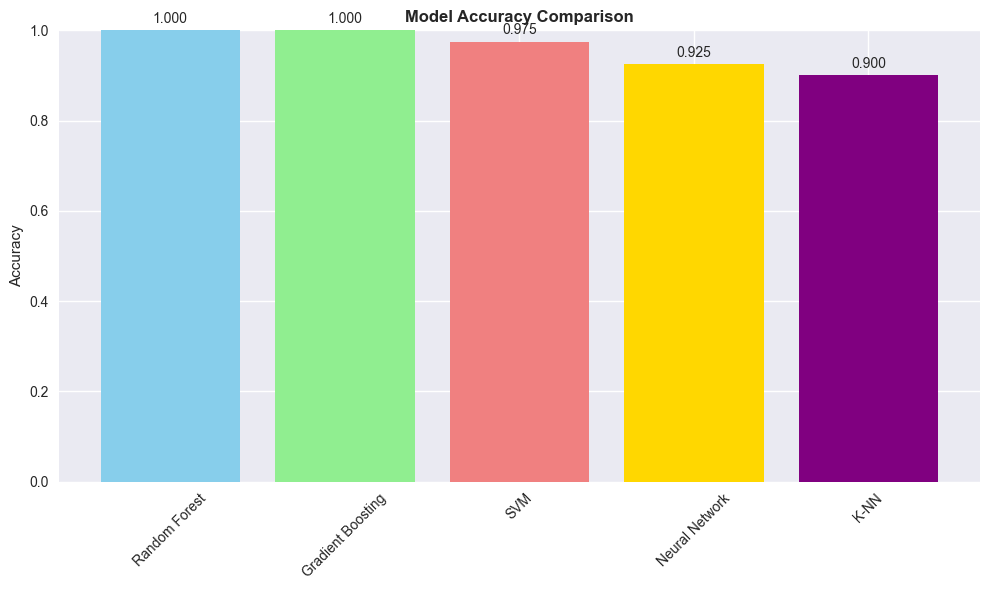

In [26]:
# 5. COMPREHENSIVE MODEL EVALUATION
print("\n" + "="*60)
print("COMPREHENSIVE MODEL EVALUATION")
print("="*60)

# Compare all models
model_comparison = pd.DataFrame({
    'Model': list(results.keys()) + ['Neural Network'],
    'Accuracy': [results[name]['accuracy'] for name in results] + [nn_test_accuracy]
}).sort_values('Accuracy', ascending=False)

print("Model Comparison:")
print(model_comparison)

# Plot model comparison
plt.figure(figsize=(10, 6))
bars = plt.bar(model_comparison['Model'], model_comparison['Accuracy'], 
               color=['skyblue', 'lightgreen', 'lightcoral', 'gold', 'purple'])
plt.title('Model Accuracy Comparison', fontweight='bold')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0, 1)

# Add accuracy values on bars
for bar, accuracy in zip(bars, model_comparison['Accuracy']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
             f'{accuracy:.3f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

In [27]:
# Detailed evaluation of best model
if nn_test_accuracy > best_ml_accuracy:
    best_model = nn_model
    best_model_type = 'Neural Network'
    y_pred_proba = best_model.predict(X_test_scaled)
    y_pred = np.argmax(y_pred_proba, axis=1)
else:
    best_model = best_ml_model
    best_model_type = best_ml_name
    y_pred = results[best_ml_name]['predictions']

print(f"\nBest Overall Model: {best_model_type}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_encoder.classes_))


Best Overall Model: SVM

Classification Report:
                                           precision    recall  f1-score   support

                         Drink more water       1.00      1.00      1.00         9
                  Increase sleep duration       1.00      0.89      0.94         9
Increase sleep duration; Drink more water       0.94      1.00      0.97        17
               Maintain current lifestyle       1.00      1.00      1.00         5

                                 accuracy                           0.97        40
                                macro avg       0.99      0.97      0.98        40
                             weighted avg       0.98      0.97      0.97        40



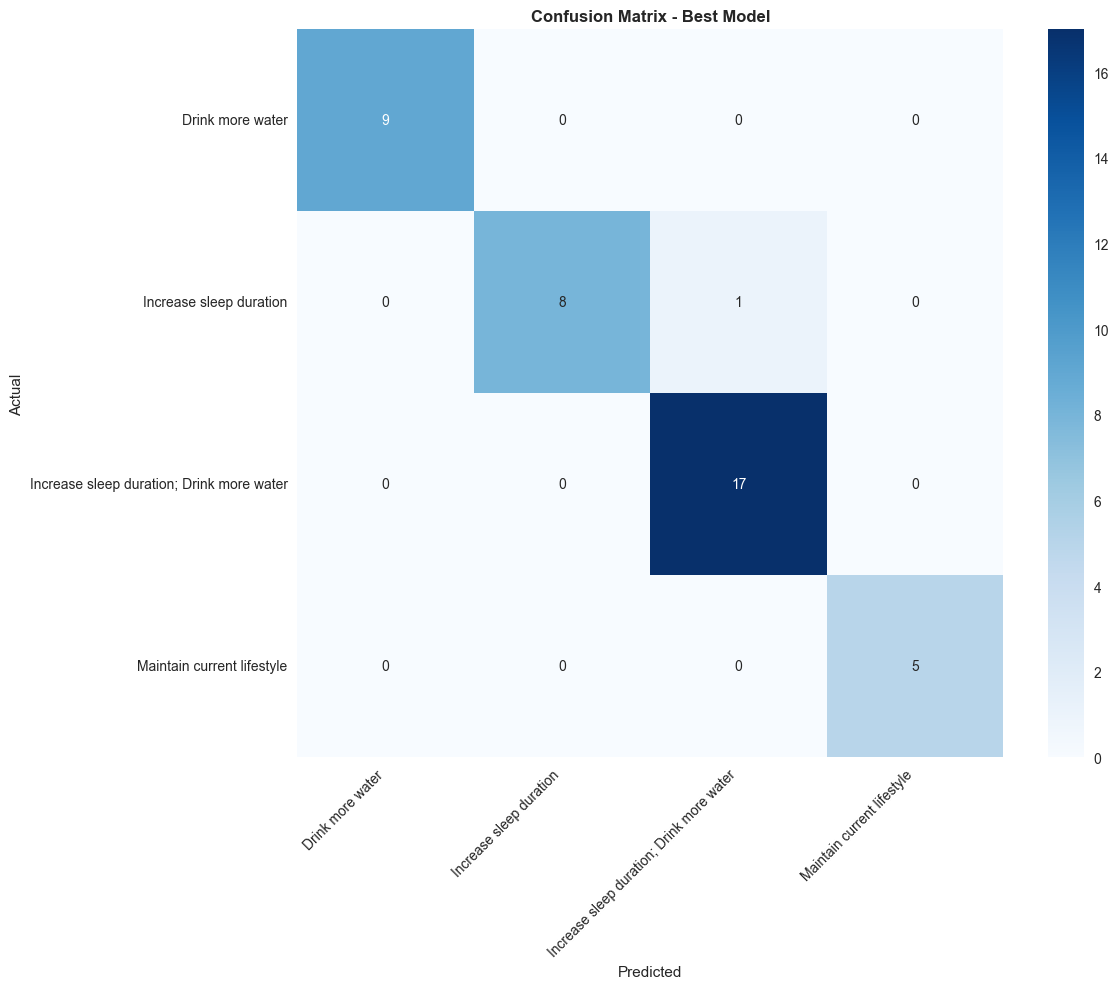

In [28]:
# Confusion matrix
plt.figure(figsize=(12, 10))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=target_encoder.classes_,
            yticklabels=target_encoder.classes_)
plt.title('Confusion Matrix - Best Model', fontweight='bold')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('lifestyle_confusion_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

In [29]:
# 6. PREDICTION PIPELINE
print("\n" + "="*60)
print("PREDICTION PIPELINE")
print("="*60)

def predict_lifestyle_recommendation(new_data):
    """
    Predict lifestyle recommendation for new data
    """
    # Create DataFrame
    input_df = pd.DataFrame([new_data])
    
    # Load encoders and scaler
    encoders = joblib.load('lifestyle_encoders.pkl')
    scaler = joblib.load('lifestyle_scaler.pkl')
    
    # Feature engineering
    input_df['sleep_deficit'] = input_df['recommended_sleep'] - input_df['sleep_hours']
    input_df['sleep_ratio'] = input_df['sleep_hours'] / input_df['recommended_sleep']
    input_df['water_deficit'] = recommended_water - input_df['water_intake_liters']
    
    # Encode categorical variables
    try:
        gender_encoded = encoders['gender'].transform(input_df[['gender']])
        gender_df = pd.DataFrame(gender_encoded, 
                               columns=encoders['gender'].get_feature_names_out(['gender']))
    except:
        # Default to Male if unknown gender
        gender_encoded = encoders['gender'].transform([['Male']])
        gender_df = pd.DataFrame(gender_encoded, 
                               columns=encoders['gender'].get_feature_names_out(['gender']))
    
    # Encode stress level
    if new_data['stress_level'] in encoders['stress_level'].classes_:
        input_df['stress_level_encoded'] = encoders['stress_level'].transform(
            [new_data['stress_level']])[0]
    else:
        input_df['stress_level_encoded'] = encoders['stress_level'].transform(['Moderate'])[0]
    
    # Combine all features
    feature_cols = ['age', 'sleep_hours', 'recommended_sleep', 'water_intake_liters', 
                   'screen_time_hours', 'sleep_deficit', 'sleep_ratio', 'water_deficit',
                   'stress_level_encoded'] + list(gender_df.columns)
    
    # Prepare final input
    final_input = pd.concat([
        input_df[['age', 'sleep_hours', 'recommended_sleep', 'water_intake_liters', 
                 'screen_time_hours', 'sleep_deficit', 'sleep_ratio', 'water_deficit',
                 'stress_level_encoded']],
        gender_df
    ], axis=1)
    
    # Scale features
    scaled_input = scaler.transform(final_input)
    
    # Load and predict with best model
    if best_model_type == 'Neural Network':
        model = keras.models.load_model('lifestyle_nn_model.h5')
        prediction_proba = model.predict(scaled_input)
    else:
        model = joblib.load('best_lifestyle_ml_model.pkl')
        prediction_proba = model.predict_proba(scaled_input)
    
    prediction_idx = np.argmax(prediction_proba)
    predicted_recommendation = encoders['recommendation'].inverse_transform([prediction_idx])[0]
    confidence = prediction_proba[0][prediction_idx]
    
    # Get top 3 recommendations with confidence
    top3_indices = np.argsort(prediction_proba[0])[-3:][::-1]
    top3_recommendations = [
        (encoders['recommendation'].inverse_transform([idx])[0], prediction_proba[0][idx])
        for idx in top3_indices
    ]
    
    return predicted_recommendation, confidence, top3_recommendations



PREDICTION PIPELINE


In [30]:
# Example usage
example_data = {
    'age': 25,
    'gender': 'Female',
    'sleep_hours': 6.5,
    'recommended_sleep': 8.0,
    'water_intake_liters': 1.8,
    'stress_level': 'High',
    'screen_time_hours': 6.2
}

predicted, confidence, top3 = predict_lifestyle_recommendation(example_data)
print(f"Example Prediction: {predicted}")
print(f"Confidence: {confidence:.2f}")
print("\nTop 3 Recommendations:")
for i, (rec, conf) in enumerate(top3, 1):
    print(f"{i}. {rec} (Confidence: {conf:.2f})")

Example Prediction: Increase sleep duration; Drink more water
Confidence: 1.00

Top 3 Recommendations:
1. Increase sleep duration; Drink more water (Confidence: 1.00)
2. Maintain current lifestyle (Confidence: 0.00)
3. Increase sleep duration (Confidence: 0.00)


## Diet Plan Model Training

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.multioutput import MultiOutputRegressor, MultiOutputClassifier
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import joblib
import warnings
warnings.filterwarnings('ignore')

In [32]:
# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('diet_plan_dataset.csv')

In [33]:
# Display basic information
print("="*60)
print("MEAL PLAN DATASET ANALYSIS")
print("="*60)
print("Dataset Overview:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())
print("\nUnique Meal Items:")
print(df['meal_items'].value_counts())
print("\nUnique BMI Status:")
print(df['bmi_status'].value_counts())
print("\nUnique Goals:")
print(df['goal'].value_counts())

MEAL PLAN DATASET ANALYSIS
Dataset Overview:
   user_id  age  gender   bmi_status         goal  meal_type      meal_items  \
0        1   23  Female  Underweight  Muscle Gain      Lunch           Kottu   
1        2   30  Female        Obese  Weight Loss  Breakfast  String Hoppers   
2        3   23  Female       Normal  Maintenance      Lunch           Kottu   
3        4   18    Male       Normal  Maintenance  Breakfast       Milk Rice   
4        5   28  Female       Normal  Maintenance      Lunch           Kottu   

   calories  protein_g  carbs_g  fats_g  
0       700         25       90      25  
1       250          6       45       2  
2       700         25       90      25  
3       300          7       50       5  
4       700         25       90      25  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     200 n


COMPREHENSIVE DATA VISUALIZATION


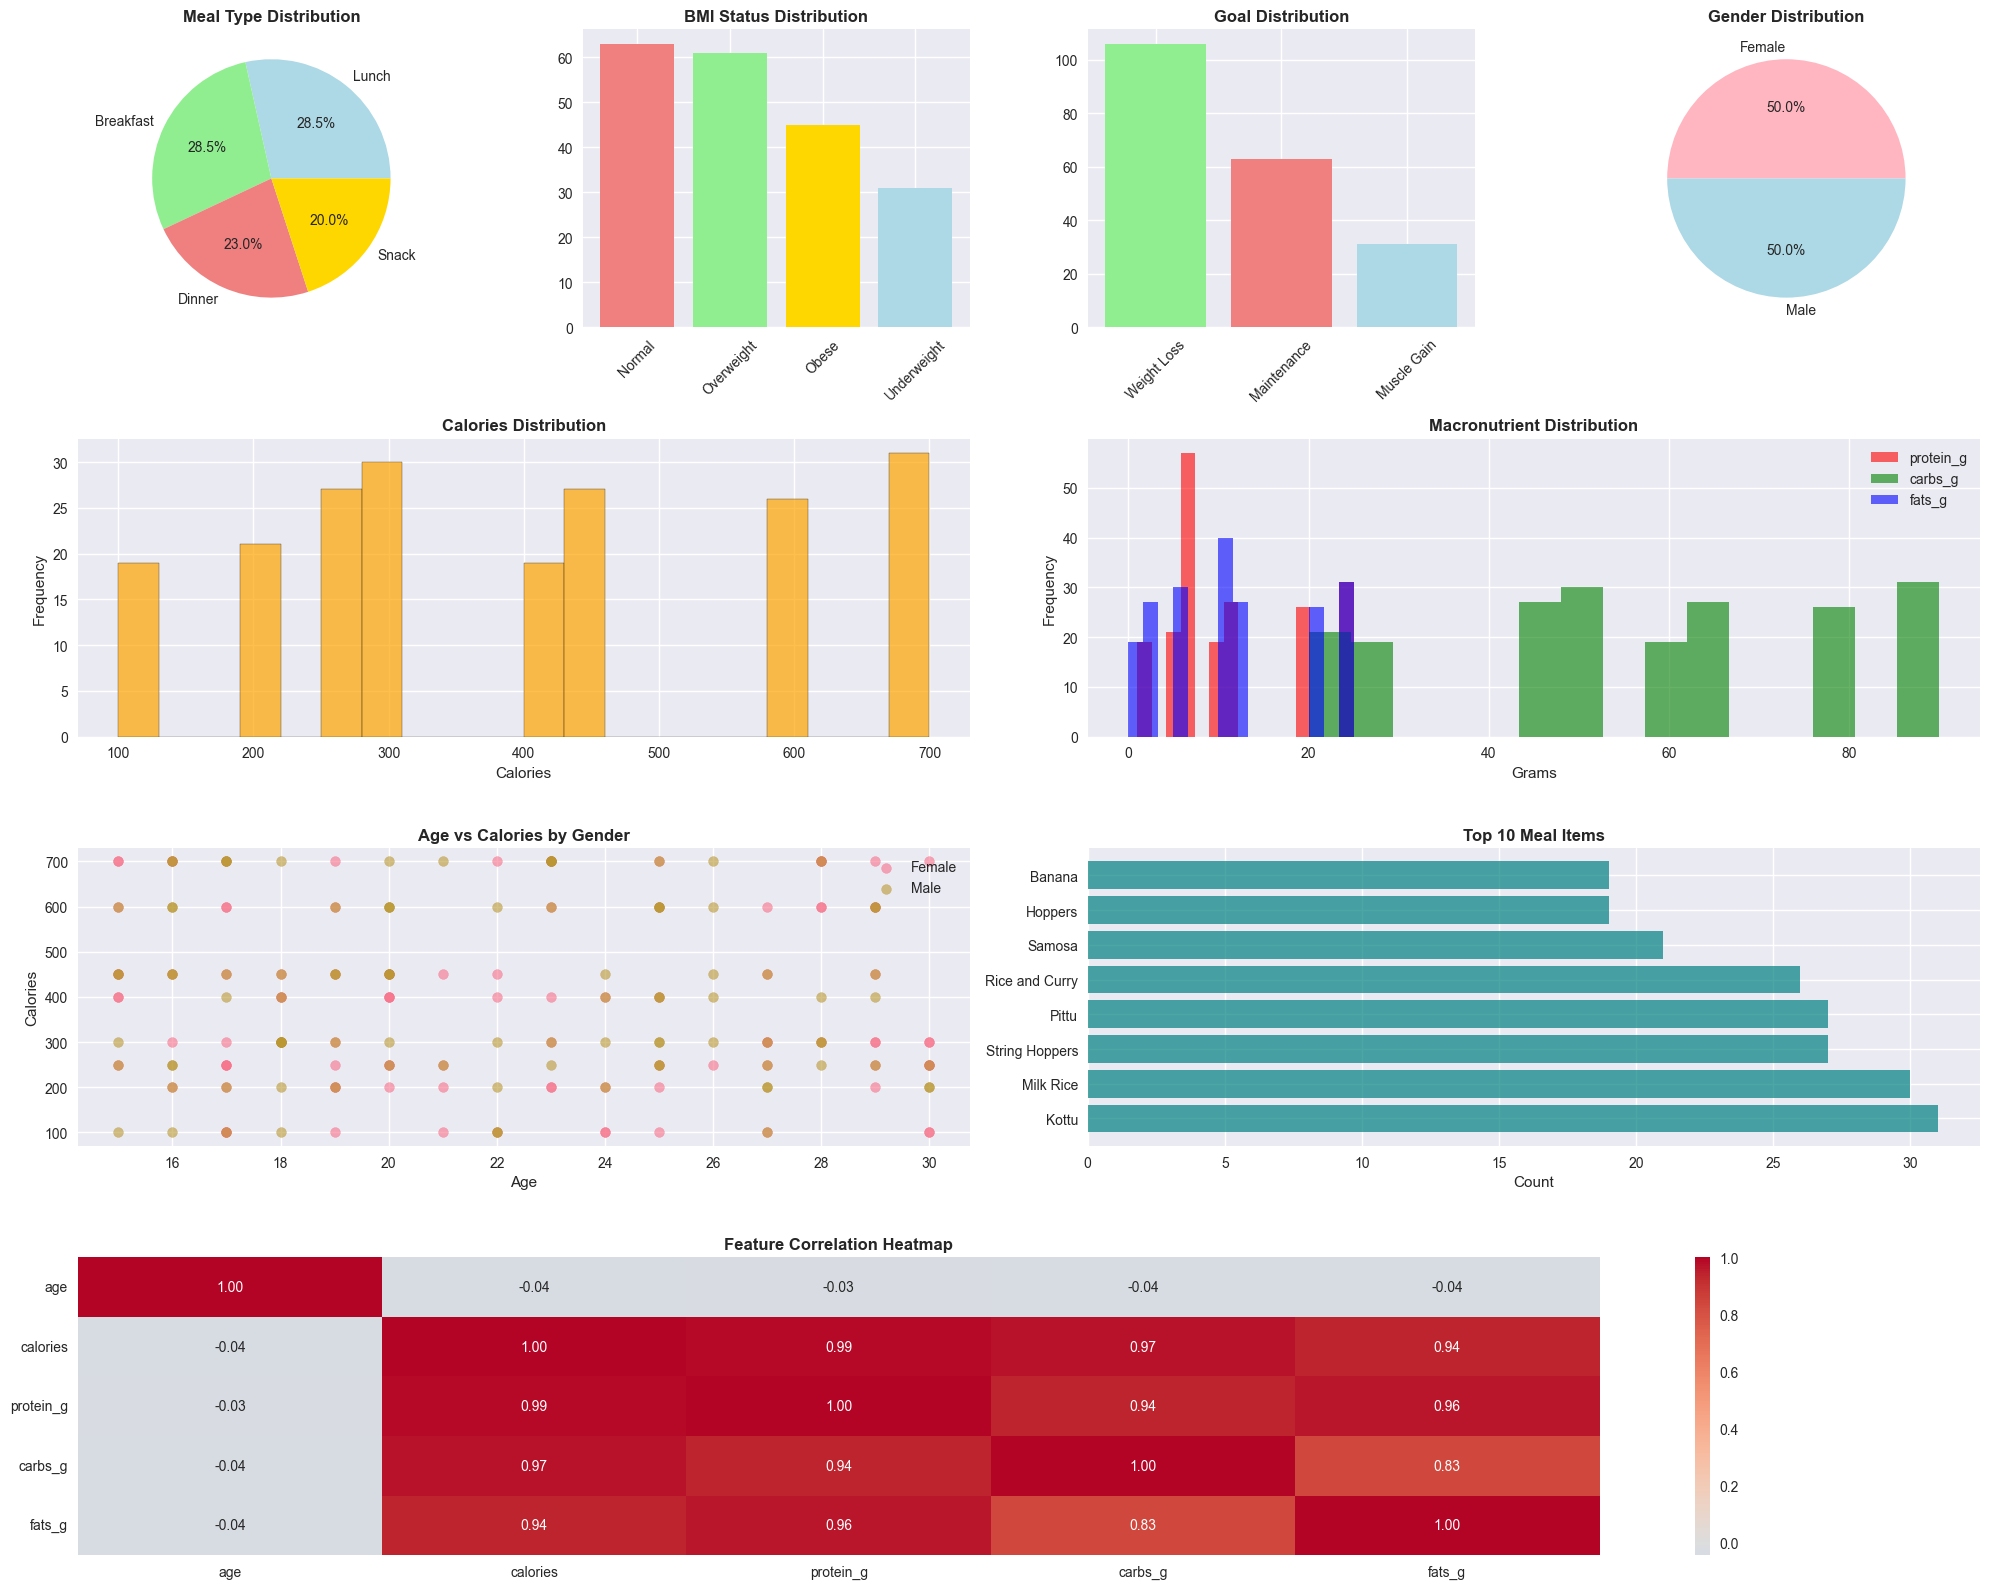

In [34]:
# 1. COMPREHENSIVE DATA VISUALIZATION
print("\n" + "="*60)
print("COMPREHENSIVE DATA VISUALIZATION")
print("="*60)

# Create a comprehensive visualization dashboard
fig = plt.figure(figsize=(20, 16))
gs = fig.add_gridspec(4, 4)

# 1.1 Meal Type Distribution
ax1 = fig.add_subplot(gs[0, 0])
meal_type_counts = df['meal_type'].value_counts()
ax1.pie(meal_type_counts.values, labels=meal_type_counts.index, autopct='%1.1f%%', 
        colors=['lightblue', 'lightgreen', 'lightcoral', 'gold'])
ax1.set_title('Meal Type Distribution', fontweight='bold')

# 1.2 BMI Status Distribution
ax2 = fig.add_subplot(gs[0, 1])
bmi_counts = df['bmi_status'].value_counts()
ax2.bar(bmi_counts.index, bmi_counts.values, 
        color=['lightcoral', 'lightgreen', 'gold', 'lightblue'])
ax2.set_title('BMI Status Distribution', fontweight='bold')
ax2.tick_params(axis='x', rotation=45)

# 1.3 Goal Distribution
ax3 = fig.add_subplot(gs[0, 2])
goal_counts = df['goal'].value_counts()
ax3.bar(goal_counts.index, goal_counts.values, 
        color=['lightgreen', 'lightcoral', 'lightblue'])
ax3.set_title('Goal Distribution', fontweight='bold')
ax3.tick_params(axis='x', rotation=45)

# 1.4 Gender Distribution
ax4 = fig.add_subplot(gs[0, 3])
gender_counts = df['gender'].value_counts()
ax4.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
        colors=['lightpink', 'lightblue'])
ax4.set_title('Gender Distribution', fontweight='bold')

# 1.5 Calories Distribution
ax5 = fig.add_subplot(gs[1, 0:2])
ax5.hist(df['calories'], bins=20, color='orange', alpha=0.7, edgecolor='black')
ax5.set_title('Calories Distribution', fontweight='bold')
ax5.set_xlabel('Calories')
ax5.set_ylabel('Frequency')

# 1.6 Macronutrient Distribution
ax6 = fig.add_subplot(gs[1, 2:])
macros = ['protein_g', 'carbs_g', 'fats_g']
colors = ['red', 'green', 'blue']
for i, macro in enumerate(macros):
    ax6.hist(df[macro], bins=15, alpha=0.6, label=macro, color=colors[i])
ax6.set_title('Macronutrient Distribution', fontweight='bold')
ax6.set_xlabel('Grams')
ax6.set_ylabel('Frequency')
ax6.legend()

# 1.7 Age vs Calories by Gender
ax7 = fig.add_subplot(gs[2, 0:2])
for gender in df['gender'].unique():
    subset = df[df['gender'] == gender]
    ax7.scatter(subset['age'], subset['calories'], alpha=0.6, label=gender, s=50)
ax7.set_xlabel('Age')
ax7.set_ylabel('Calories')
ax7.set_title('Age vs Calories by Gender', fontweight='bold')
ax7.legend()

# 1.8 Top Meal Items
ax8 = fig.add_subplot(gs[2, 2:])
top_meals = df['meal_items'].value_counts().head(10)
ax8.barh(top_meals.index, top_meals.values, color='teal', alpha=0.7)
ax8.set_title('Top 10 Meal Items', fontweight='bold')
ax8.set_xlabel('Count')

# 1.9 Correlation Heatmap
ax9 = fig.add_subplot(gs[3, :])
numeric_cols = ['age', 'calories', 'protein_g', 'carbs_g', 'fats_g']
correlation_matrix = df[numeric_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, ax=ax9, fmt='.2f')
ax9.set_title('Feature Correlation Heatmap', fontweight='bold')

plt.tight_layout()
plt.savefig('meal_plan_visualization_dashboard.png', dpi=300, bbox_inches='tight')
plt.show()

In [35]:
# 2. ADVANCED DATA PREPROCESSING
print("\n" + "="*60)
print("ADVANCED DATA PREPROCESSING")
print("="*60)

# Create a copy for processing
df_processed = df.copy()

# Encode categorical variables
encoders = {}
categorical_cols = ['gender', 'bmi_status', 'goal', 'meal_type', 'meal_items']

# Target encoders
meal_encoder = LabelEncoder()
df_processed['meal_items_encoded'] = meal_encoder.fit_transform(df_processed['meal_items'])
encoders['meal_items'] = meal_encoder

print("Encoded meal items:")
for i, class_name in enumerate(meal_encoder.classes_):
    print(f"  {class_name} -> {i}")

# Feature encoders
feature_encoder = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(drop='first'), ['gender', 'bmi_status', 'goal', 'meal_type'])
    ],
    remainder='passthrough'
)

# Prepare features and targets
X = df_processed[['age', 'gender', 'bmi_status', 'goal', 'meal_type']]
y_meal = df_processed['meal_items_encoded']  # Categorical output
y_calories = df_processed['calories']        # Numerical output

# Split the data
X_train, X_test, y_meal_train, y_meal_test, y_calories_train, y_calories_test = train_test_split(
    X, y_meal, y_calories, test_size=0.2, random_state=42, stratify=y_meal
)

# Fit and transform the feature encoder
X_train_encoded = feature_encoder.fit_transform(X_train)
X_test_encoded = feature_encoder.transform(X_test)

# Get feature names
feature_names = []
for name, transformer, columns in feature_encoder.transformers_:
    if name == 'onehot':
        feature_names.extend(feature_encoder.named_transformers_['onehot'].get_feature_names_out(columns))
    else:
        feature_names.extend(columns)

feature_names = [name for name in feature_names if name not in ['age']] + ['age']

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Save encoders and scaler
joblib.dump(feature_encoder, 'meal_feature_encoder.pkl')
joblib.dump(scaler, 'meal_scaler.pkl')
joblib.dump(encoders, 'meal_encoders.pkl')
print("Encoders and scaler saved")


ADVANCED DATA PREPROCESSING
Encoded meal items:
  Banana -> 0
  Hoppers -> 1
  Kottu -> 2
  Milk Rice -> 3
  Pittu -> 4
  Rice and Curry -> 5
  Samosa -> 6
  String Hoppers -> 7
Encoders and scaler saved


In [36]:
# 3. MULTI-OUTPUT MODEL TRAINING
print("\n" + "="*60)
print("MULTI-OUTPUT MODEL TRAINING")
print("="*60)

# Approach 1: Separate models for each output
print("Training separate models for each output...")

# Model for meal items (classification)
meal_model = RandomForestClassifier(n_estimators=100, random_state=42)
meal_model.fit(X_train_scaled, y_meal_train)
meal_pred = meal_model.predict(X_test_scaled)
meal_accuracy = accuracy_score(y_meal_test, meal_pred)
print(f"Meal Items Accuracy: {meal_accuracy:.4f}")

# Model for calories (regression)
calories_model = RandomForestRegressor(n_estimators=100, random_state=42)
calories_model.fit(X_train_scaled, y_calories_train)
calories_pred = calories_model.predict(X_test_scaled)
calories_mae = mean_absolute_error(y_calories_test, calories_pred)
calories_r2 = r2_score(y_calories_test, calories_pred)
print(f"Calories MAE: {calories_mae:.2f}, R²: {calories_r2:.4f}")


MULTI-OUTPUT MODEL TRAINING
Training separate models for each output...
Meal Items Accuracy: 0.5000
Calories MAE: 36.48, R²: 0.9446


In [37]:
# Approach 2: Multi-output models
print("\nTraining multi-output models...")

# Multi-output classifier for meal items + regressor for calories
multi_model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))

# Prepare multi-output target
y_multi_train = np.column_stack((y_meal_train, y_calories_train))
y_multi_test = np.column_stack((y_meal_test, y_calories_test))

multi_model.fit(X_train_scaled, y_multi_train)
multi_pred = multi_model.predict(X_test_scaled)

# Evaluate multi-output model
multi_meal_accuracy = accuracy_score(y_meal_test, np.round(multi_pred[:, 0]).astype(int))
multi_calories_mae = mean_absolute_error(y_calories_test, multi_pred[:, 1])
multi_calories_r2 = r2_score(y_calories_test, multi_pred[:, 1])

print(f"Multi-output Model - Meal Accuracy: {multi_meal_accuracy:.4f}, Calories MAE: {multi_calories_mae:.2f}, R²: {multi_calories_r2:.4f}")


Training multi-output models...
Multi-output Model - Meal Accuracy: 0.1000, Calories MAE: 36.48, R²: 0.9446


In [38]:
# 4. NEURAL NETWORK FOR MULTI-OUTPUT PREDICTION
print("\n" + "="*60)
print("NEURAL NETWORK FOR MULTI-OUTPUT PREDICTION")
print("="*60)

def create_multi_output_nn(input_dim, meal_output_dim):
    # Input layer
    inputs = keras.Input(shape=(input_dim,))
    
    # Shared hidden layers
    x = layers.Dense(128, activation='relu')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(64, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.3)(x)
    
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dropout(0.2)(x)
    
    # Separate output layers
    # Meal items output (classification)
    meal_output = layers.Dense(meal_output_dim, activation='softmax', name='meal_output')(x)
    
    # Calories output (regression)
    calories_output = layers.Dense(1, activation='linear', name='calories_output')(x)
    
    # Create model
    model = keras.Model(inputs=inputs, outputs=[meal_output, calories_output])
    
    # Compile with different losses for each output
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=0.001),
        loss={
            'meal_output': 'sparse_categorical_crossentropy',
            'calories_output': 'mse'
        },
        metrics={
            'meal_output': 'accuracy',
            'calories_output': ['mae', 'mse']
        },
        loss_weights={'meal_output': 1.0, 'calories_output': 0.5}
    )
    
    return model

# Create and train neural network
nn_model = create_multi_output_nn(X_train_scaled.shape[1], len(np.unique(y_meal)))

# Callbacks
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=15, restore_best_weights=True
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001
)

# Train the model
history = nn_model.fit(
    X_train_scaled,
    {'meal_output': y_meal_train, 'calories_output': y_calories_train},
    epochs=100,
    batch_size=16,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate neural network
nn_results = nn_model.evaluate(
    X_test_scaled,
    {'meal_output': y_meal_test, 'calories_output': y_calories_test},
    verbose=0
)

print("Neural Network Results:")
print(f"Meal Accuracy: {nn_results[3]:.4f}")
print(f"Calories MAE: {nn_results[4]:.2f}")


NEURAL NETWORK FOR MULTI-OUTPUT PREDICTION
Epoch 1/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 78ms/step - calories_output_loss: 195212.9219 - calories_output_mae: 398.2243 - calories_output_mse: 195212.9219 - loss: 97609.2578 - meal_output_accuracy: 0.1562 - meal_output_loss: 2.8045 - val_calories_output_loss: 184312.3281 - val_calories_output_mae: 382.8390 - val_calories_output_mse: 184312.3281 - val_loss: 92158.2656 - val_meal_output_accuracy: 0.1250 - val_meal_output_loss: 2.0984 - learning_rate: 0.0010
Epoch 2/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - calories_output_loss: 194763.3438 - calories_output_mae: 397.8531 - calories_output_mse: 194763.3438 - loss: 97384.4922 - meal_output_accuracy: 0.1406 - meal_output_loss: 2.8358 - val_calories_output_loss: 184178.4375 - val_calories_output_mae: 382.6967 - val_calories_output_mse: 184178.4375 - val_loss: 92091.3125 - val_meal_output_accuracy: 0.1250 - val_meal_output_loss: 2.0943 - learning_rate: 0.0010
Epoch 3/100
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [39]:
# Save models
joblib.dump(meal_model, 'meal_items_model.pkl')
joblib.dump(calories_model, 'calories_model.pkl')
nn_model.save('meal_nn_model.h5')
print("All models saved")

All models saved



MODEL COMPARISON AND EVALUATION
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/stepWARNING:tensorflow:5 out of the last 5 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001EE931B2660> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
Model Comparison:
          Approach  Meal Accuracy  Calories MAE  Calories R²
0  Separate Models       0.500000     36.476845     0.944598
1  Multi-output RF       0.100000     36.476845     0.944598
2   Neural Network      53.911213   4381.383789     0.878795


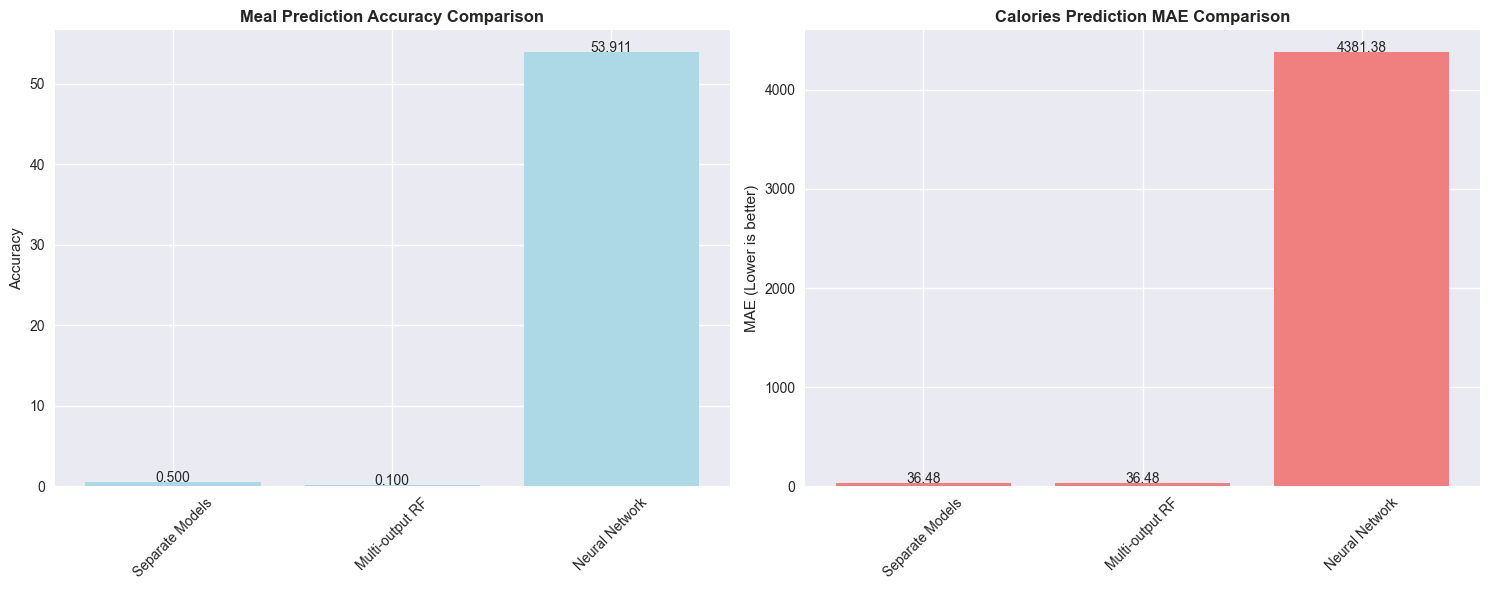

In [40]:
# 5. MODEL COMPARISON AND EVALUATION
print("\n" + "="*60)
print("MODEL COMPARISON AND EVALUATION")
print("="*60)

# Compare all approaches
comparison_data = [
    {'Approach': 'Separate Models', 'Meal Accuracy': meal_accuracy, 
     'Calories MAE': calories_mae, 'Calories R²': calories_r2},
    {'Approach': 'Multi-output RF', 'Meal Accuracy': multi_meal_accuracy, 
     'Calories MAE': multi_calories_mae, 'Calories R²': multi_calories_r2},
    {'Approach': 'Neural Network', 'Meal Accuracy': nn_results[3], 
     'Calories MAE': nn_results[4], 'Calories R²': r2_score(y_calories_test, nn_model.predict(X_test_scaled)[1].flatten())}
]

comparison_df = pd.DataFrame(comparison_data)
print("Model Comparison:")
print(comparison_df)

# Plot comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Meal accuracy comparison
ax1.bar(comparison_df['Approach'], comparison_df['Meal Accuracy'], color='lightblue')
ax1.set_title('Meal Prediction Accuracy Comparison', fontweight='bold')
ax1.set_ylabel('Accuracy')
ax1.tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Meal Accuracy']):
    ax1.text(i, v + 0.01, f'{v:.3f}', ha='center')

# Calories MAE comparison
ax2.bar(comparison_df['Approach'], comparison_df['Calories MAE'], color='lightcoral')
ax2.set_title('Calories Prediction MAE Comparison', fontweight='bold')
ax2.set_ylabel('MAE (Lower is better)')
ax2.tick_params(axis='x', rotation=45)
for i, v in enumerate(comparison_df['Calories MAE']):
    ax2.text(i, v + 0.1, f'{v:.2f}', ha='center')

plt.tight_layout()
plt.savefig('meal_model_comparison.png', dpi=300, bbox_inches='tight')
plt.show()


In [41]:
# 6. PREDICTION PIPELINE
print("\n" + "="*60)
print("PREDICTION PIPELINE")
print("="*60)

def predict_meal_plan(new_data, use_nn=True):
    """
    Predict meal items and calories for new data
    """
    # Create DataFrame
    input_df = pd.DataFrame([new_data])
    
    # Load encoders and scaler
    feature_encoder = joblib.load('meal_feature_encoder.pkl')
    scaler = joblib.load('meal_scaler.pkl')
    encoders = joblib.load('meal_encoders.pkl')
    
    # Transform input
    input_encoded = feature_encoder.transform(input_df)
    input_scaled = scaler.transform(input_encoded)
    
    if use_nn:
        try:
            # Try to load neural network model with custom handling
            model = keras.models.load_model('meal_nn_model.h5', compile=False)
            
            # Recompile the model if needed
            model.compile(
                optimizer=keras.optimizers.Adam(learning_rate=0.001),
                loss={
                    'meal_output': 'sparse_categorical_crossentropy',
                    'calories_output': 'mse'
                },
                metrics={
                    'meal_output': 'accuracy',
                    'calories_output': ['mae', 'mse']
                }
            )
            
            meal_pred_proba, calories_pred = model.predict(input_scaled)
            meal_pred = np.argmax(meal_pred_proba, axis=1)
            confidence = np.max(meal_pred_proba, axis=1)[0]
            
        except Exception as e:
            print(f"Neural network loading failed: {e}")
            print("Falling back to separate models...")
            use_nn = False
    
    if not use_nn:
        # Use separate models
        meal_model = joblib.load('meal_items_model.pkl')
        calories_model = joblib.load('calories_model.pkl')
        
        meal_pred = meal_model.predict(input_scaled)
        meal_pred_proba = meal_model.predict_proba(input_scaled)
        confidence = np.max(meal_pred_proba, axis=1)[0]
        calories_pred = calories_model.predict(input_scaled)
    
    # Decode predictions
    predicted_meal = encoders['meal_items'].inverse_transform(meal_pred)[0]
    predicted_calories = float(calories_pred[0])
    
    # Get top 3 meal recommendations
    if use_nn:
        top3_indices = np.argsort(meal_pred_proba[0])[-3:][::-1]
        top3_meals = [
            (encoders['meal_items'].inverse_transform([idx])[0], meal_pred_proba[0][idx])
            for idx in top3_indices
        ]
    else:
        top3_indices = np.argsort(meal_pred_proba[0])[-3:][::-1]
        top3_meals = [
            (encoders['meal_items'].inverse_transform([idx])[0], meal_pred_proba[0][idx])
            for idx in top3_indices
        ]
    
    return predicted_meal, predicted_calories, confidence, top3_meals

# Alternative prediction function that doesn't rely on neural network
def predict_meal_plan_safe(new_data):
    """
    Safe prediction using only traditional ML models
    """
    # Create DataFrame
    input_df = pd.DataFrame([new_data])
    
    # Load encoders and scaler
    feature_encoder = joblib.load('meal_feature_encoder.pkl')
    scaler = joblib.load('meal_scaler.pkl')
    encoders = joblib.load('meal_encoders.pkl')
    
    # Transform input
    input_encoded = feature_encoder.transform(input_df)
    input_scaled = scaler.transform(input_encoded)
    
    # Use separate models
    meal_model = joblib.load('meal_items_model.pkl')
    calories_model = joblib.load('calories_model.pkl')
    
    meal_pred = meal_model.predict(input_scaled)
    meal_pred_proba = meal_model.predict_proba(input_scaled)
    confidence = np.max(meal_pred_proba, axis=1)[0]
    calories_pred = calories_model.predict(input_scaled)
    
    # Decode predictions
    predicted_meal = encoders['meal_items'].inverse_transform(meal_pred)[0]
    predicted_calories = float(calories_pred[0])
    
    # Get top 3 meal recommendations
    top3_indices = np.argsort(meal_pred_proba[0])[-3:][::-1]
    top3_meals = [
        (encoders['meal_items'].inverse_transform([idx])[0], meal_pred_proba[0][idx])
        for idx in top3_indices
    ]
    
    return predicted_meal, predicted_calories, confidence, top3_meals

# Example usage
example_data = {
    'age': 25,
    'gender': 'Female',
    'bmi_status': 'Normal',
    'goal': 'Maintenance',
    'meal_type': 'Lunch'
}

print("Example Prediction (Safe Mode - Traditional Models):")
try:
    predicted_meal, predicted_calories, confidence, top3_meals = predict_meal_plan_safe(example_data)
    print(f"Recommended Meal: {predicted_meal}")
    print(f"Estimated Calories: {predicted_calories:.0f}")
    print(f"Confidence: {confidence:.2f}")
    print("\nTop 3 Meal Recommendations:")
    for i, (meal, conf) in enumerate(top3_meals, 1):
        print(f"{i}. {meal} (Confidence: {conf:.2f})")
        
except Exception as e:
    print(f"Error in prediction: {e}")
    print("Please check if all required model files are available.")

print("\nTrying with neural network (may fail):")
try:
    predicted_meal, predicted_calories, confidence, top3_meals = predict_meal_plan(example_data, use_nn=True)
    print(f"Recommended Meal: {predicted_meal}")
    print(f"Estimated Calories: {predicted_calories:.0f}")
    print(f"Confidence: {confidence:.2f}")
    print("\nTop 3 Meal Recommendations:")
    for i, (meal, conf) in enumerate(top3_meals, 1):
        print(f"{i}. {meal} (Confidence: {conf:.2f})")
except Exception as e:
    print(f"Neural network prediction failed: {e}")
    print("Using traditional models instead...")
    predicted_meal, predicted_calories, confidence, top3_meals = predict_meal_plan_safe(example_data)
    print(f"Recommended Meal: {predicted_meal}")
    print(f"Estimated Calories: {predicted_calories:.0f}")
    print(f"Confidence: {confidence:.2f}")
    print("\nTop 3 Meal Recommendations:")
    for i, (meal, conf) in enumerate(top3_meals, 1):
        print(f"{i}. {meal} (Confidence: {conf:.2f})")


PREDICTION PIPELINE
Example Prediction (Safe Mode - Traditional Models):
Recommended Meal: Kottu
Estimated Calories: 646
Confidence: 0.57

Top 3 Meal Recommendations:
1. Kottu (Confidence: 0.57)
2. Rice and Curry (Confidence: 0.41)
3. String Hoppers (Confidence: 0.02)

Trying with neural network (may fail):


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
Recommended Meal: Rice and Curry
Estimated Calories: 686
Confidence: 0.62

Top 3 Meal Recommendations:
1. Rice and Curry (Confidence: 0.62)
2. Kottu (Confidence: 0.38)
3. Hoppers (Confidence: 0.00)
